<a href="https://colab.research.google.com/github/devfmx/master-data-ai/blob/main/Kata%20Proyectos/who_earned_the_most_in_sports_in_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of the highest paid athletes in the world


**Here is an analysis of the world's Top 10 highest paid athelets from 1990 to 2020. The analysis brings out some interesting facts:**

- Tiger Woods dominates the list of Top ranked recently while earlier it was Michael Jordan
- USA dominates the world when it comes to earnings
- Monica Seles is the only women to make the top-10 highest paid athlete list from 1990 to 2020
- Top 3 earners in 2020 are soccer players
- Basketball players earn the most followed by Boxing and Golf.



## Updated for year 2020

# Objective

This notebook is targetted towards beginners in Data Analysis. We begin by analysing the data and then we use plotly for visualisation to get better insights. Also, we plot a racing bar graph with only matplotlib to help the effects come out.

In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime

#Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
!pip install pycountry
import pycountry
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins

# Image
import numpy as np
from PIL import Image

# Animation
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

# Graphics in retina format 
%config InlineBackend.figure_format = 'retina' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5


# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [65]:
# List files available
#print(os.listdir("../input"))


# 1. Reading and Preprocessing the data


### Steps :
* Read in the data using pandas
* Convert Year column to datetime
* Convert the text in the Sport column to either upper or lower case

In [66]:
df = pd.read_csv('forbes-dataset-2020.csv')
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [67]:

# Creating a copy of the original dataframe- df
df1 = df.copy()
df1.drop('S.NO',axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  301 non-null    object 
 1   Nationality           301 non-null    object 
 2   Current Rank          301 non-null    int64  
 3   Previous Year Rank    277 non-null    object 
 4   Sport                 301 non-null    object 
 5   Year                  301 non-null    int64  
 6   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 16.6+ KB


In [68]:

# Convert string to datetime64
df1['Year'] = df1['Year'].apply(pd.to_datetime,format='%Y')

#Set Date column as the index column.
df1['year'] = pd.DatetimeIndex(df1['Year']).year  
df1.set_index('year', inplace=True)
df1.drop('Year',axis=1,inplace=True)

# Converting the sport column to uppercase
df1['Sport'] = df1['Sport'].str.upper()
df1.head()

# df is the original dataframe while df1 is a copy where the Date has been set as an index column

,Name,Nationality,Current Rank,Previous Year Rank,Sport,earnings ($ million)
year,,,,,,
1990,Mike Tyson,USA,1,NaN,BOXING,28.6
1990,Buster Douglas,USA,2,NaN,BOXING,26.0
1990,Sugar Ray Leonard,USA,3,NaN,BOXING,13.0
1990,Ayrton Senna,Brazil,4,NaN,AUTO RACING,10.0
1990,Alain Prost,France,5,NaN,AUTO RACING,9.0



# 2. World's Highest-Paid Athletes in 2020


In [69]:
data_2020 = df1[df1.index == 2020]

trace = go.Bar(
                    x = data_2020["earnings ($ million)"],
                    y = data_2020['Name'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title="World's Highest-Paid Athletes in 2020",width=800, height=500, 
                       xaxis= dict(title='No of times ranked higest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)



 # 3. Analysis of Higest paid Athlete each year from 1990 to 2020
---

In [70]:
# Top Paid Athlete for Each Year
Top_paid_each_year = df1[df1['Current Rank'] == 1].sort_values(by='year',ascending=False)

z = Top_paid_each_year[['Name','Sport','Nationality','earnings ($ million)']]

#z.style.set_properties(**{'background-color': 'pink',
                           # 'color': 'black',
                            #'border-color': 'white'})
z.style.background_gradient(cmap='Reds')  

,Name,Sport,Nationality,earnings ($ million)
year,,,,
2020,Roger Federer,TENNIS,Switzerland,106.300000
2019,Lionel Messi,SOCCER,Argentina,127.000000
2018,Floyd Mayweather,BOXING,USA,285.000000
2017,Cristiano Ronaldo,SOCCER,Portugal,93.000000
2016,Cristiano Ronaldo,SOCCER,Portugal,88.000000
2015,Floyd Mayweather,BOXING,USA,300.000000
2014,Floyd Mayweather,BOXING,USA,105.000000
2013,Tiger Woods,GOLF,USA,78.100000
2012,Floyd Mayweather,BOXING,USA,85.000000


## Athlete earning the most,maximum number of times

In [71]:
counts_top = Top_paid_each_year['Name'].value_counts().to_frame()


trace = go.Bar(
                    y = counts_top.index,
                    x = counts_top['Name'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Athlete earning the most,maximum number of times',width=800, height=500, 
                       xaxis= dict(title='No of times ranked higest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)


In [72]:
total_earnings = Top_paid_each_year.groupby('Name')['earnings ($ million)'].sum().to_frame().reset_index()
top_ranks = Top_paid_each_year['Name'].value_counts().to_frame().reset_index()
top_ranks.rename(columns={'index':'Name',
                          'Name':'Rank_counts'}, inplace=True)
df_compare = total_earnings.merge(top_ranks, on='Name')


In [73]:
#source: https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners#Bar-Charts

import plotly.graph_objs as go
from plotly import tools
trace0 = go.Bar(
                y=df_compare['Name'],
                x=df_compare['Rank_counts'],
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='Top Ranks',
                orientation='h',
)

trace1 = go.Scatter(
                y=df_compare['Name'],
                x=df_compare['earnings ($ million)'],
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='income',
)

layout = dict(
                title='Income and Top Ranks',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=False,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []
y_s = df_compare['Rank_counts']
y_nw = np.rint(df_compare['earnings ($ million)'])
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, df_compare['Name']):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn-1,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd+1,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations


# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
fig.show()

## Country which produces the maximum earners in Sports

In [74]:
counts_top = Top_paid_each_year['Nationality'].value_counts().to_frame()


trace = go.Bar(
                    x = counts_top.index,
                    y = counts_top['Nationality'] ,
                    orientation='v',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Country which produces the maximum earners in Sports',width=800, height=500, 
                       xaxis= dict(title='No of times ranked higest'),
                       #yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## How much the Top Paid Athlete for Each Year, earn? 

In [75]:


trace = go.Scatter(
                    x = Top_paid_each_year.index,
                    y = Top_paid_each_year['earnings ($ million)'] ,
                    orientation='v',
                    marker = dict(color='red',
                                 line=dict(color='royalblue',width=2)),
                    )
data = [trace]
layout = go.Layout(title='How much did the Top Paid Athlete for Each Year, earn? ',width=800, height=500, 
                       xaxis= dict(title='Years'),
                       yaxis=dict(title="Earning in US Dollars(million)"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)


# 4. Analysis of the Top Ten Higest paid Athletes each year from 1990 to 2010
---



## Sport which dominates in earnings

In [76]:
df['Sport'] = df['Sport'].str.upper() # Converting the text to uppercase
max_sport = df['Sport'].value_counts().to_frame()

trace = go.Bar(
                    y = max_sport.index,
                    x = max_sport['Sport'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Sport which dominates in earnings',width=800, height=500, 
                       xaxis= dict(title='No of times ranked highest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Country which dominates in Sports earnings

In [77]:

max_sport = df['Nationality'].value_counts().to_frame()


trace = go.Bar(
                    y = max_sport.index,
                    x = max_sport['Nationality'] ,
                    orientation='h',
                    marker = dict(color='pink',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Country which dominates in Sports earningss',width=800, height=500, 
                       xaxis= dict(title='No of times ranked highest'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Athletes appearing maximum time on the list

In [78]:

s = df['Name'].value_counts().to_frame()[:5]
s.style.background_gradient(cmap='Reds')  


,Name
Tiger Woods,19
Michael Jordan,19
Kobe Bryant,14
LeBron James,13
Michael Schumacher,13


# 5. Where are the Women?
---



[Monica Seles](https://en.wikipedia.org/wiki/Monica_Seles) is the only female to make the list of top-10 highest paid athlete list so far. She did so in 1992.
![](https://i.pinimg.com/originals/61/37/6b/61376b658905c296da43839a74fc5f56.jpg)
PC: [Pinterest](https://in.pinterest.com/pin/360006563933324090/?lp=true)

In [79]:
# People who have appeared once on the list.
names = df['Name'].value_counts().to_frame()
names[names['Name']==1].index

# On scanning the list, we find the name of a sole women athlete- monica seles
monica = df[df['Name'] == 'Monica Seles']
monica.style.set_properties(**{'background-color': 'pink',
                            'color': 'black',
                            'border-color': 'black'})

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
29,30,Monica Seles,USA,10,12,TENNIS,1992,8.500000


# 6. Analysis Top three earning players of all time
---



In [80]:
top_earners_alltime = pd.pivot_table(df, index='Name',values="earnings ($ million)", aggfunc='sum')
top3_earners_all = top_earners_alltime.sort_values(by="earnings ($ million)",ascending=False)[:3]

top3_earners_all.style.background_gradient(cmap='Reds')  

,earnings ($ million)
Name,
Tiger Woods,1373.800000
LeBron James,844.800000
Floyd Mayweather,840.000000


### Analysing Tiger Woods earnings over the years



In [81]:

def earnings_plot(dataframe,athlete):
    """
    function that creates a plotly line chart with image of the athlete in the background
    
    
    """
    athlete_df = df1[df1['Name'] == athlete]

    trace = go.Scatter(
                    x = athlete_df.index,
                    y = athlete_df['earnings ($ million)'] ,
                    orientation='v',
                    marker = dict(color='red',
                                 line=dict(color='red',width=6)),
                    )
    data = [trace]
    layout= go.Layout(title= f'{athlete}' +"'s earnings over the Years",
                  xaxis=dict(title='Year'),
                  yaxis=dict(title="Earnings in US$ (millions)"),
                  images= [dict(
                          #source=Image.open(image_path),
                          xref= "paper",
                          yref= "paper",
                          x= 0.5,
                          y= 0.5,
                          sizex= 1,
                          sizey= 1,
                          sizing= "stretch",
                          xanchor= "center", 
                          yanchor="middle",
                          layer= "below")])
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)


In [82]:
image_path = "/kaggle/input/profile-pics/tiger_woods.jpeg"
earnings_plot(df1,'Tiger Woods')

### Analysing Floyd Mayweather earnings over the years

In [83]:
image_path = "/profile-pics/Floyd.jpeg"
earnings_plot(df1,'Floyd Mayweather')

### Analysing LeBron James earnings over the years

In [84]:
image_path = "/kaggle/input/profile-pics/LeBron.jpeg"
earnings_plot(df1,'LeBron James')


# 7. Racing Bar chart
---


Credit for the code : @pratapvardhan; credit @jburnmurdoch. Also refer to this article [Bar Chart Race in Python with Matplotlib](https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41) by **Pratap Vardhan**
 for a step by step process to recreate it.

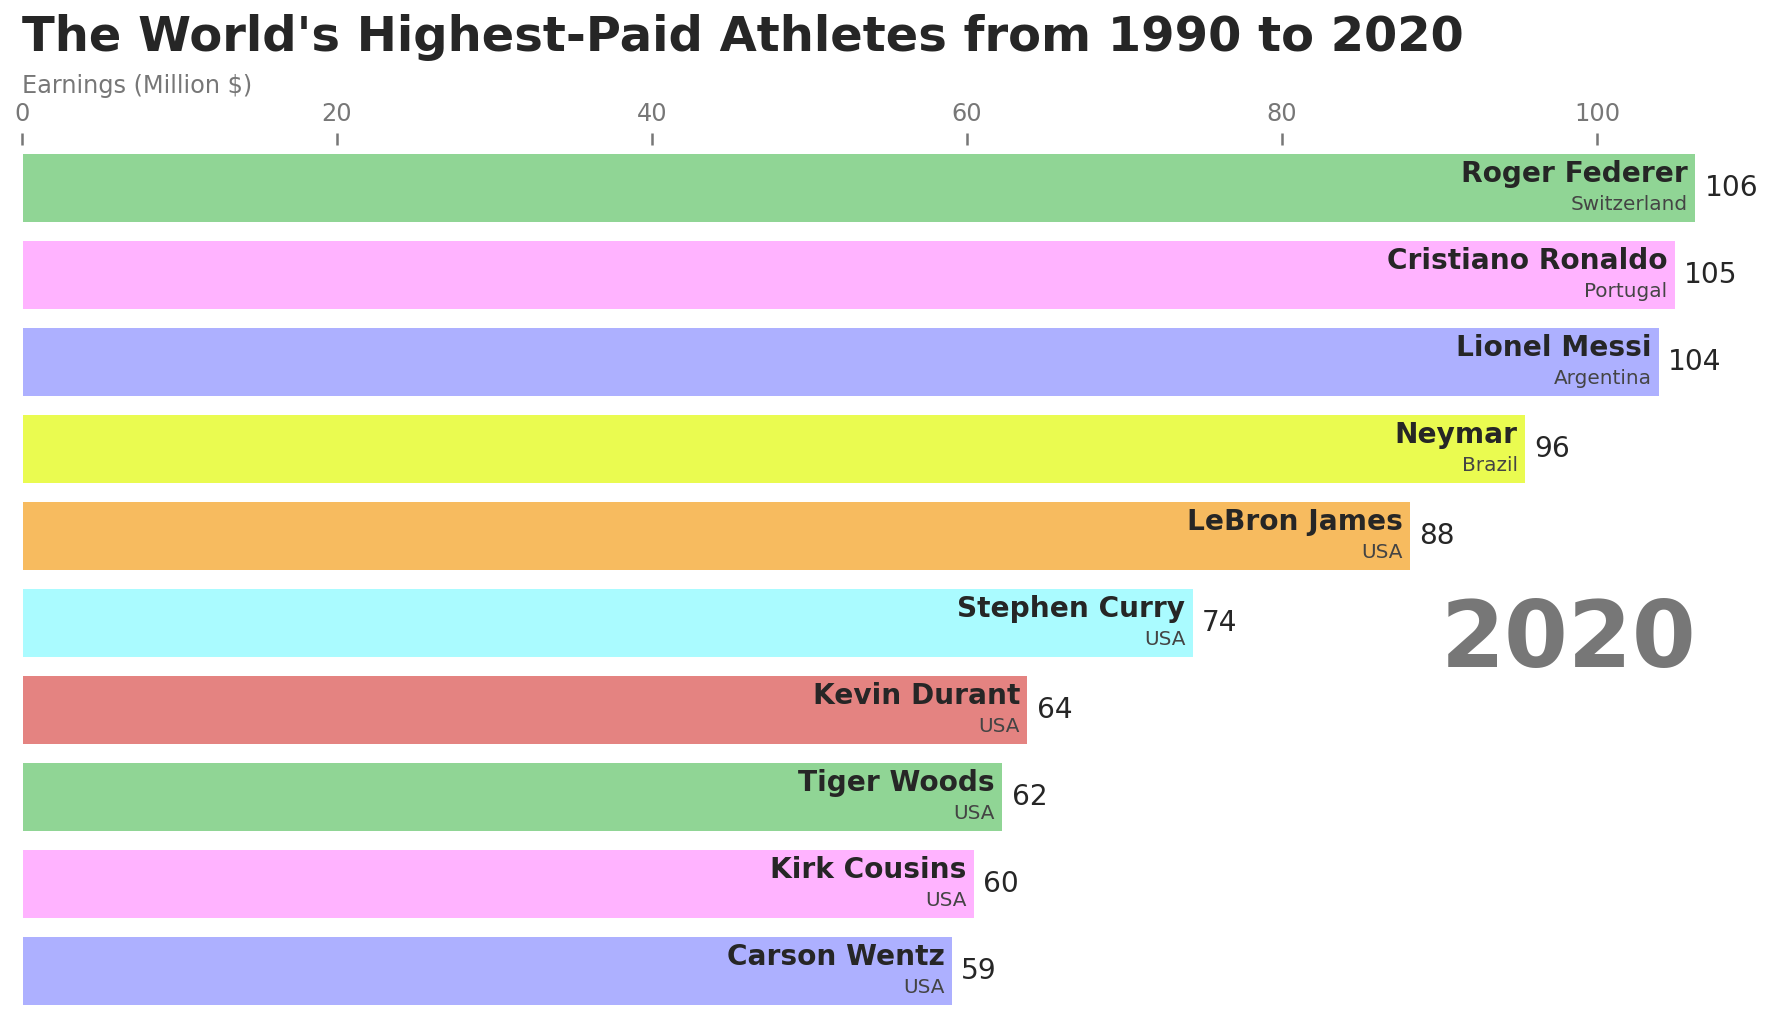

In [85]:

import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

data = df[['Name','Nationality','Year','earnings ($ million)']]
data.rename(columns={'earnings ($ million)':'value'},inplace=True)

group_lk = df.set_index('Name')['Nationality'].to_dict()

colors = ["#adb0ff", "#ffb3ff", "#90d595", "#e48381", "#aafbff", "#f7bb5f", "#eafb50"]



fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(current_year):
    dff = data[data['Year'].eq(current_year)].sort_values(by='value', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Name'], dff['value'],color=colors)
    dx = dff['value'].max() / 200
    for i, (value, name) in enumerate(zip(dff['value'], dff['Name'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, current_year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Earnings (Million $)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, "The World's Highest-Paid Athletes from 1990 to 2020",
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='white')
    plt.box(False)
    
draw_barchart(2020)



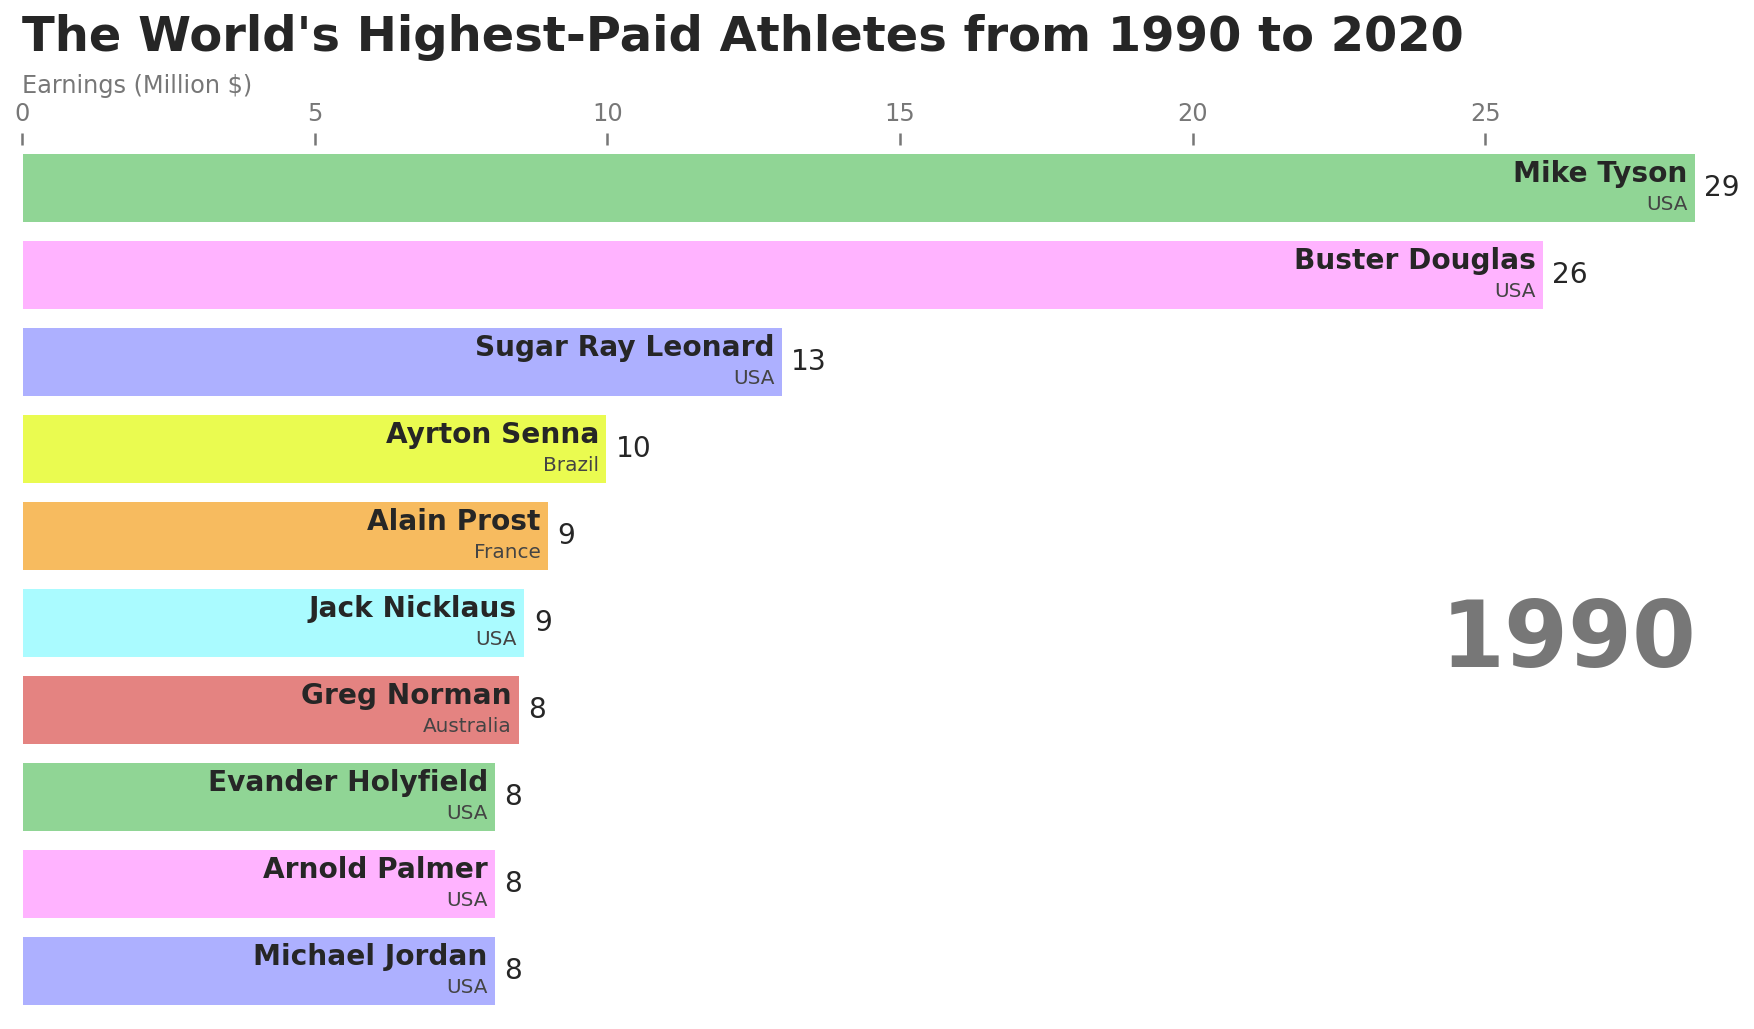

In [86]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1990, 2020))
HTML(animator.to_jshtml())
